<a href="https://colab.research.google.com/github/jason-howald/Math-125/blob/master/Chi_Squared_Formula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Chi-Square Test, under the hood

## Testing a proportion, revisited:



- A sample of $n$ cases has a two-category variable.
- observed counts $\hat{c}_1$,$\hat{c}_2$ 
- observed proportions $\hat{p}=\frac{\hat{c}_1}{n}$ and $\hat{q}=\frac{\hat{c}_2}{n}$
- predicted proportions $p=\frac{c_1}{n}$ and $q=\frac{c_2}{n}$ 
- $SE = \sqrt{\frac{p(1-p)}{n}}$
- $Z = \frac{\hat{p}-p}{SE} = \frac{\hat{p}-p}{\sqrt{\frac{p(1-p)}{n}}}$
- $Z^2 = \frac{(\hat{p}-p)^2}{p(1-p)/n} $


## Algebra Fact for Context

$$Z^2 = \frac{(\hat{p}-p)^2}{p(1-p)/n}  = \frac{(\hat{c}_1-c_1)^2}{c_1} + \frac{(\hat{c}_2-c_2)^2}{c_2}$$

This formula looks like it has two independent variables -- $\hat{c}_1$ and $\hat{c}_2$ -- but since $\hat{c}_2 = n-\hat{c}_1$ there is only one true variable.  This formula has only **one degree of freedom.**

##The Chi Square $\chi^2$ Test statistic $Z^2$:


For a sample with several categories, sample counts $\hat{c}_i$ and expected counts $c_i$:

 $$Z^2 = \frac{(\hat{c}_1-c_1)^2}{c_1} + \frac{(\hat{c}_2-c_2)^2}{c_2} + \ldots + \frac{(\hat{c}_k-c_k)^2}{c_k}$$

This test statistic has $\chi^2$ distribution with $k-1$ degrees of freedom.


##Let's see a graph of the $\chi^2$ distribution(s)

These are the graphs against which $Z^2$ must be compared.

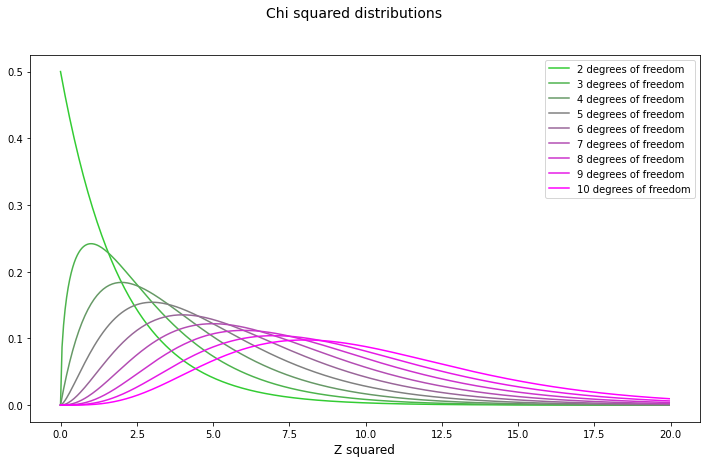

In [0]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,20,0.05)
y = stats.chi2.pdf(x,5)
D = 10
fig, ax = plt.subplots()
fig.set_size_inches(12, 12/16*9)
fig.suptitle('Chi squared distributions', fontsize=14)
ax.set_xlabel('Z squared', fontsize=12)

for f in range(2,D+1):
  y = stats.chi2.pdf(x,f)
  plt.plot(x,y,color = (f/D,(1-f/D),f/D,1), label=f"{f} degrees of freedom")
plt.legend()
plt.show()

## Finding the p-value, assessing significance:

**Option 1:**
Use the built-in function 
"scipy.stats.chi2.cdf(test_stat,degrees)". It gives left tail areas, so subtract from one:

In [0]:
1-stats.chi2.cdf(8,3)

0.04601170568923141

**Option 2:** Use an online calculator. 
For example:

[https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)

**Option 3:** Use old school table lookup. 

In [0]:
#Recalculate and print a standard chi^2 table.
alphas = [0.3, 0.2, 0.1,0.05,0.02,0.01,0.005,0.001]
dof = [i for i in range(2,21)] + [5*i for i in range(5,11)] 
chi2table = pd.DataFrame({alpha:{deg:round(stats.chi2.ppf(1-alpha,deg),2) for deg in dof} for alpha in alphas})
chi2table

,0.300,0.200,0.100,0.050,0.020,0.010,0.005,0.001
2,2.41,3.22,4.61,5.99,7.82,9.21,10.60,13.82
3,3.66,4.64,6.25,7.81,9.84,11.34,12.84,16.27
4,4.88,5.99,7.78,9.49,11.67,13.28,14.86,18.47
5,6.06,7.29,9.24,11.07,13.39,15.09,16.75,20.52
6,7.23,8.56,10.64,12.59,15.03,16.81,18.55,22.46
7,8.38,9.80,12.02,14.07,16.62,18.48,20.28,24.32
8,9.52,11.03,13.36,15.51,18.17,20.09,21.95,26.12
9,10.66,12.24,14.68,16.92,19.68,21.67,23.59,27.88
10,11.78,13.44,15.99,18.31,21.16,23.21,25.19,29.59
11,12.90,14.63,17.28,19.68,22.62,24.72,26.76,31.26


# An example from start to finish

## The question:

Does home isolation change people's interest in film genres?

## The data 
(completely made up!)



Out of 1000 views during isolation...

| Genre | Isolation | Normal |
| ------------- |:-------------:| -----:|
| Action | 275 | 30% |
| Comedy | 225 | 20% |
| Drama  | 200 | 20% |
| Horror | 220 | 20% |
| Romance| 80 | 10% |

Sample counts: $275, 225, 200, 220, 80$

Expected counts: $300,200,200,200,100$



## The Chi Squared test ("by hand")




$$Z^2 = 
\frac{(275-300)^2}{300} + 
\frac{(225-200)^2}{200} + 
\frac{(200-200)^2}{200} + 
\frac{(220-200)^2}{200} + 
\frac{(80-100)^2}{100}$$

$$Z^2 = 11.208333$$

How to get the p-value?
We compare this to a $\chi^2$ distribution with $5-1=4$ degrees of freedom.

**Option 1: stats.chi2.cdf()**

In [0]:
1-stats.chi2.cdf(11.208333,4)

0.02431976797899149

**Option 2: Online lookup applet**

[https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)

**Option 3: Paper table lookup**

(Also see textbook)

In [0]:
chi2table

**Conclusion:** At the standard threshold $\alpha = 0.05$, we reject the null hypothesis. That is, viewing habits have changed in a statistically significant way.

## Compare to fully automated test: 

For comparison, we run the whole test using stats.chisquare():

In [0]:
stats.chisquare([275,225,200,220,80],[300,200,200,200,100])

Power_divergenceResult(statistic=11.208333333333334, pvalue=0.02431976453944509)

# Conditions for Applicability



- Independent cases
- Expected counts $\geq 5$ 
- Degrees of freedom $\geq 2$. (One degree of freedom should be simple proportion test.)